#Last Lecture!

# NOTE: This is the code I used in class. So, its not commented, but maybe you can see learn something from it!

Announcements:

1. CAPEs due: Monday, June 7 at 8:00am

  1.   If >50% submit, everyone gets a bonus points
  2.   If >75% submit, everyone gets 2 bonus points

2. Discussion board 4
3. Final project is due Tuesday June 8th at midnight
  - Any 2 analysis techniques
  - Descriptive stats in analysis section -> mode for categorical
  

Topics:

1. Review!

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'plotly'

lets get some data

In [2]:
data = pd.read_csv('https://web.stanford.edu/~hastie/ElemStatLearn/datasets/LAozone.data')

In [3]:
data.head()

,ozone,vh,wind,humidity,temp,ibh,dpg,ibt,vis,doy
0,3,5710,4,28,40,2693,-25,87,250,3
1,5,5700,3,37,45,590,-24,128,100,4
2,5,5760,3,51,54,1450,25,139,60,5
3,6,5720,4,69,35,1568,15,121,60,6
4,4,5790,6,19,45,2631,-33,123,100,7


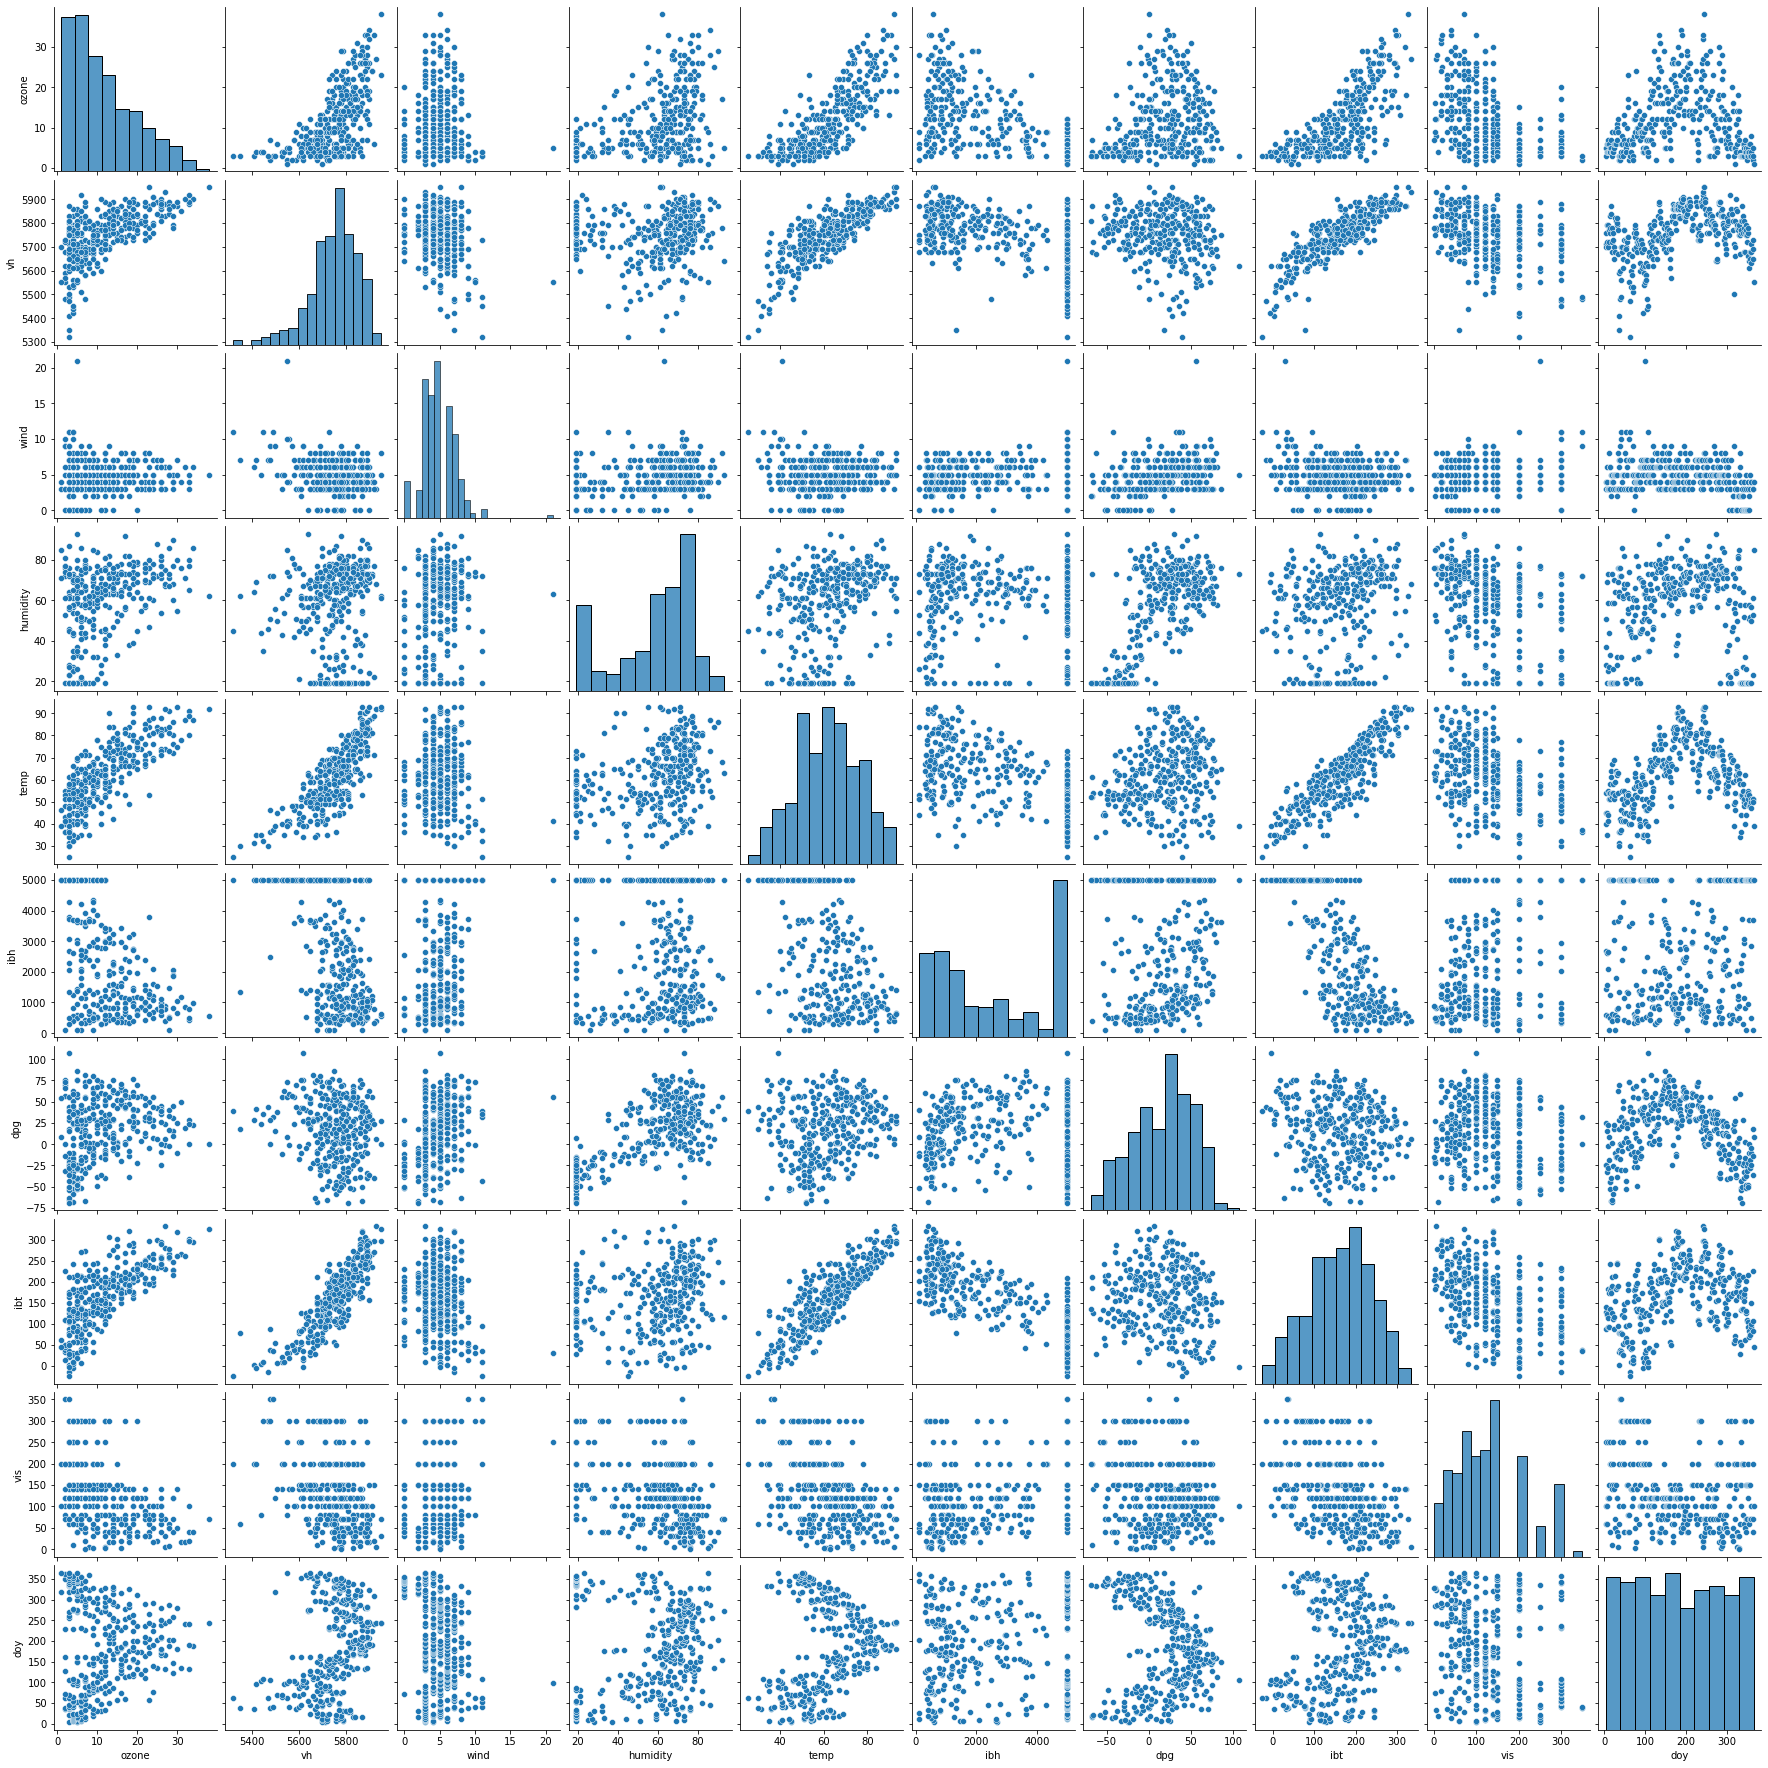

In [4]:
sns.pairplot(data)

In [5]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/credit.csv')

In [6]:
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


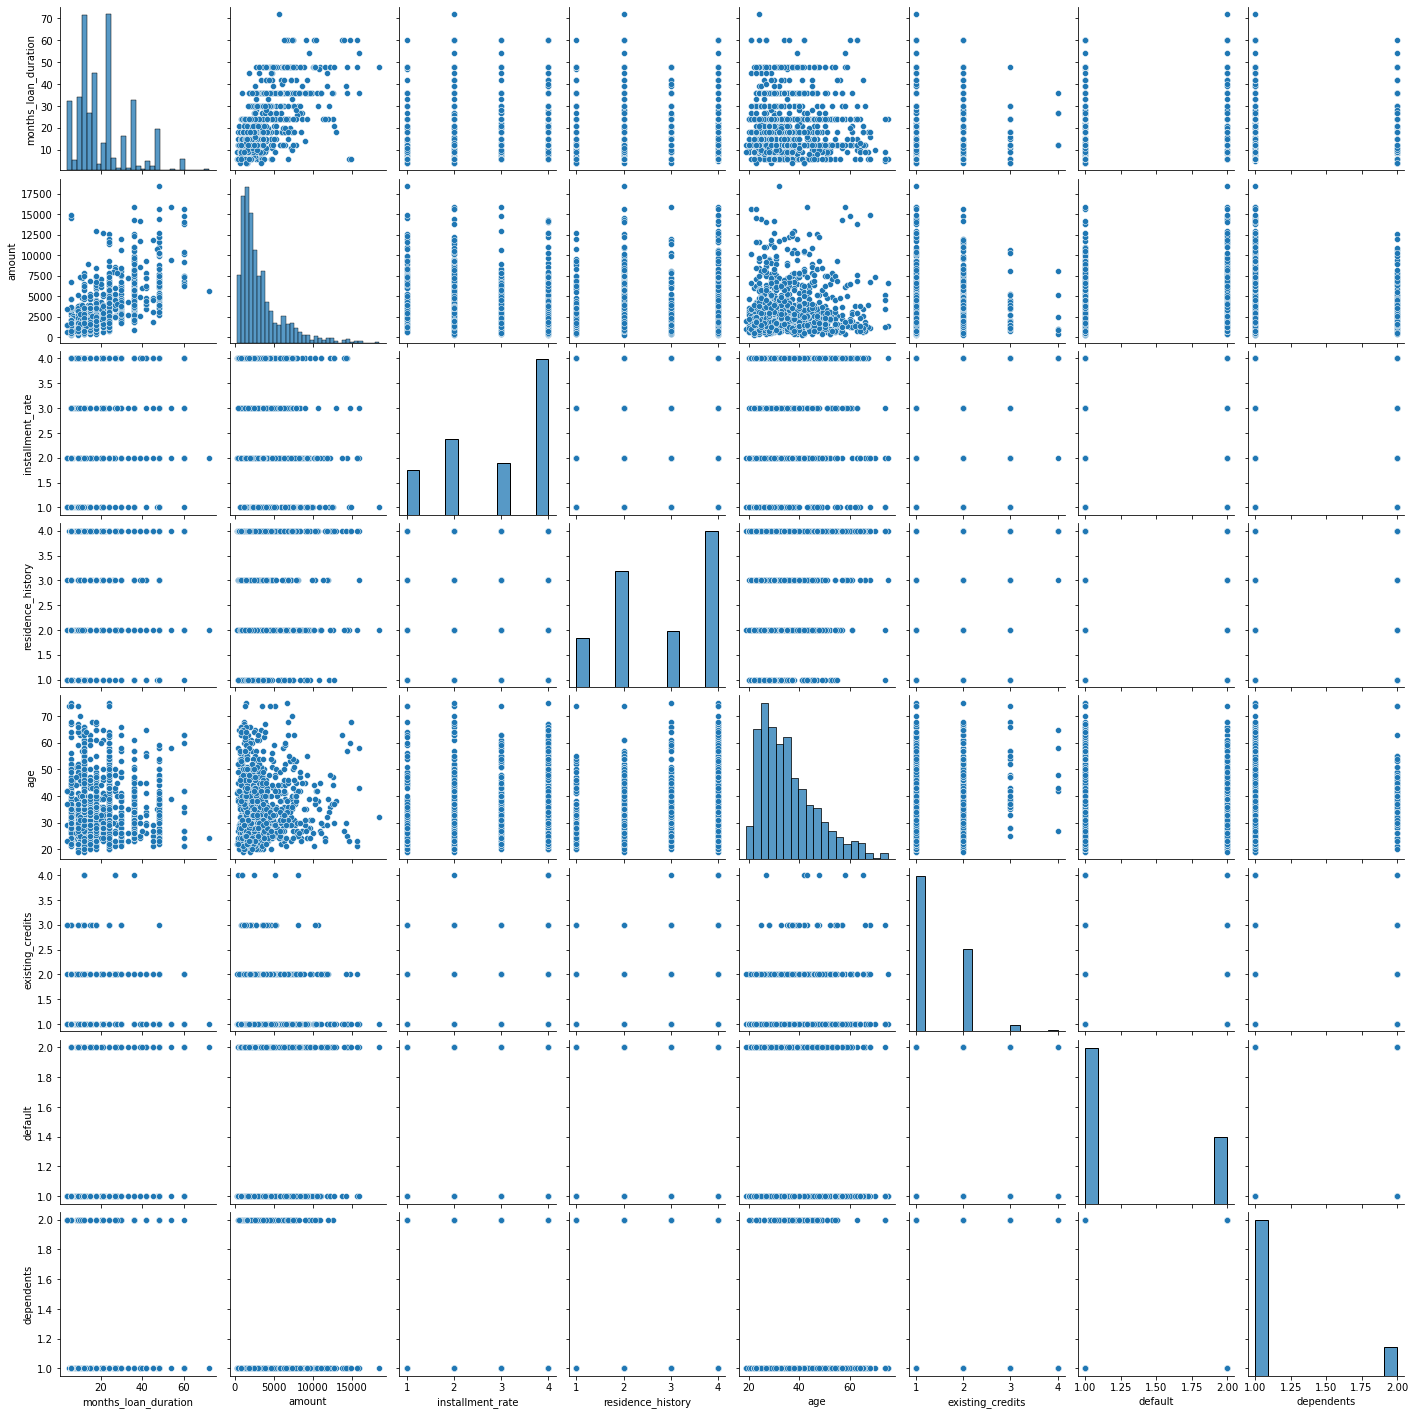

In [7]:
sns.pairplot(data)

In [8]:
data = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/whitewines.csv')

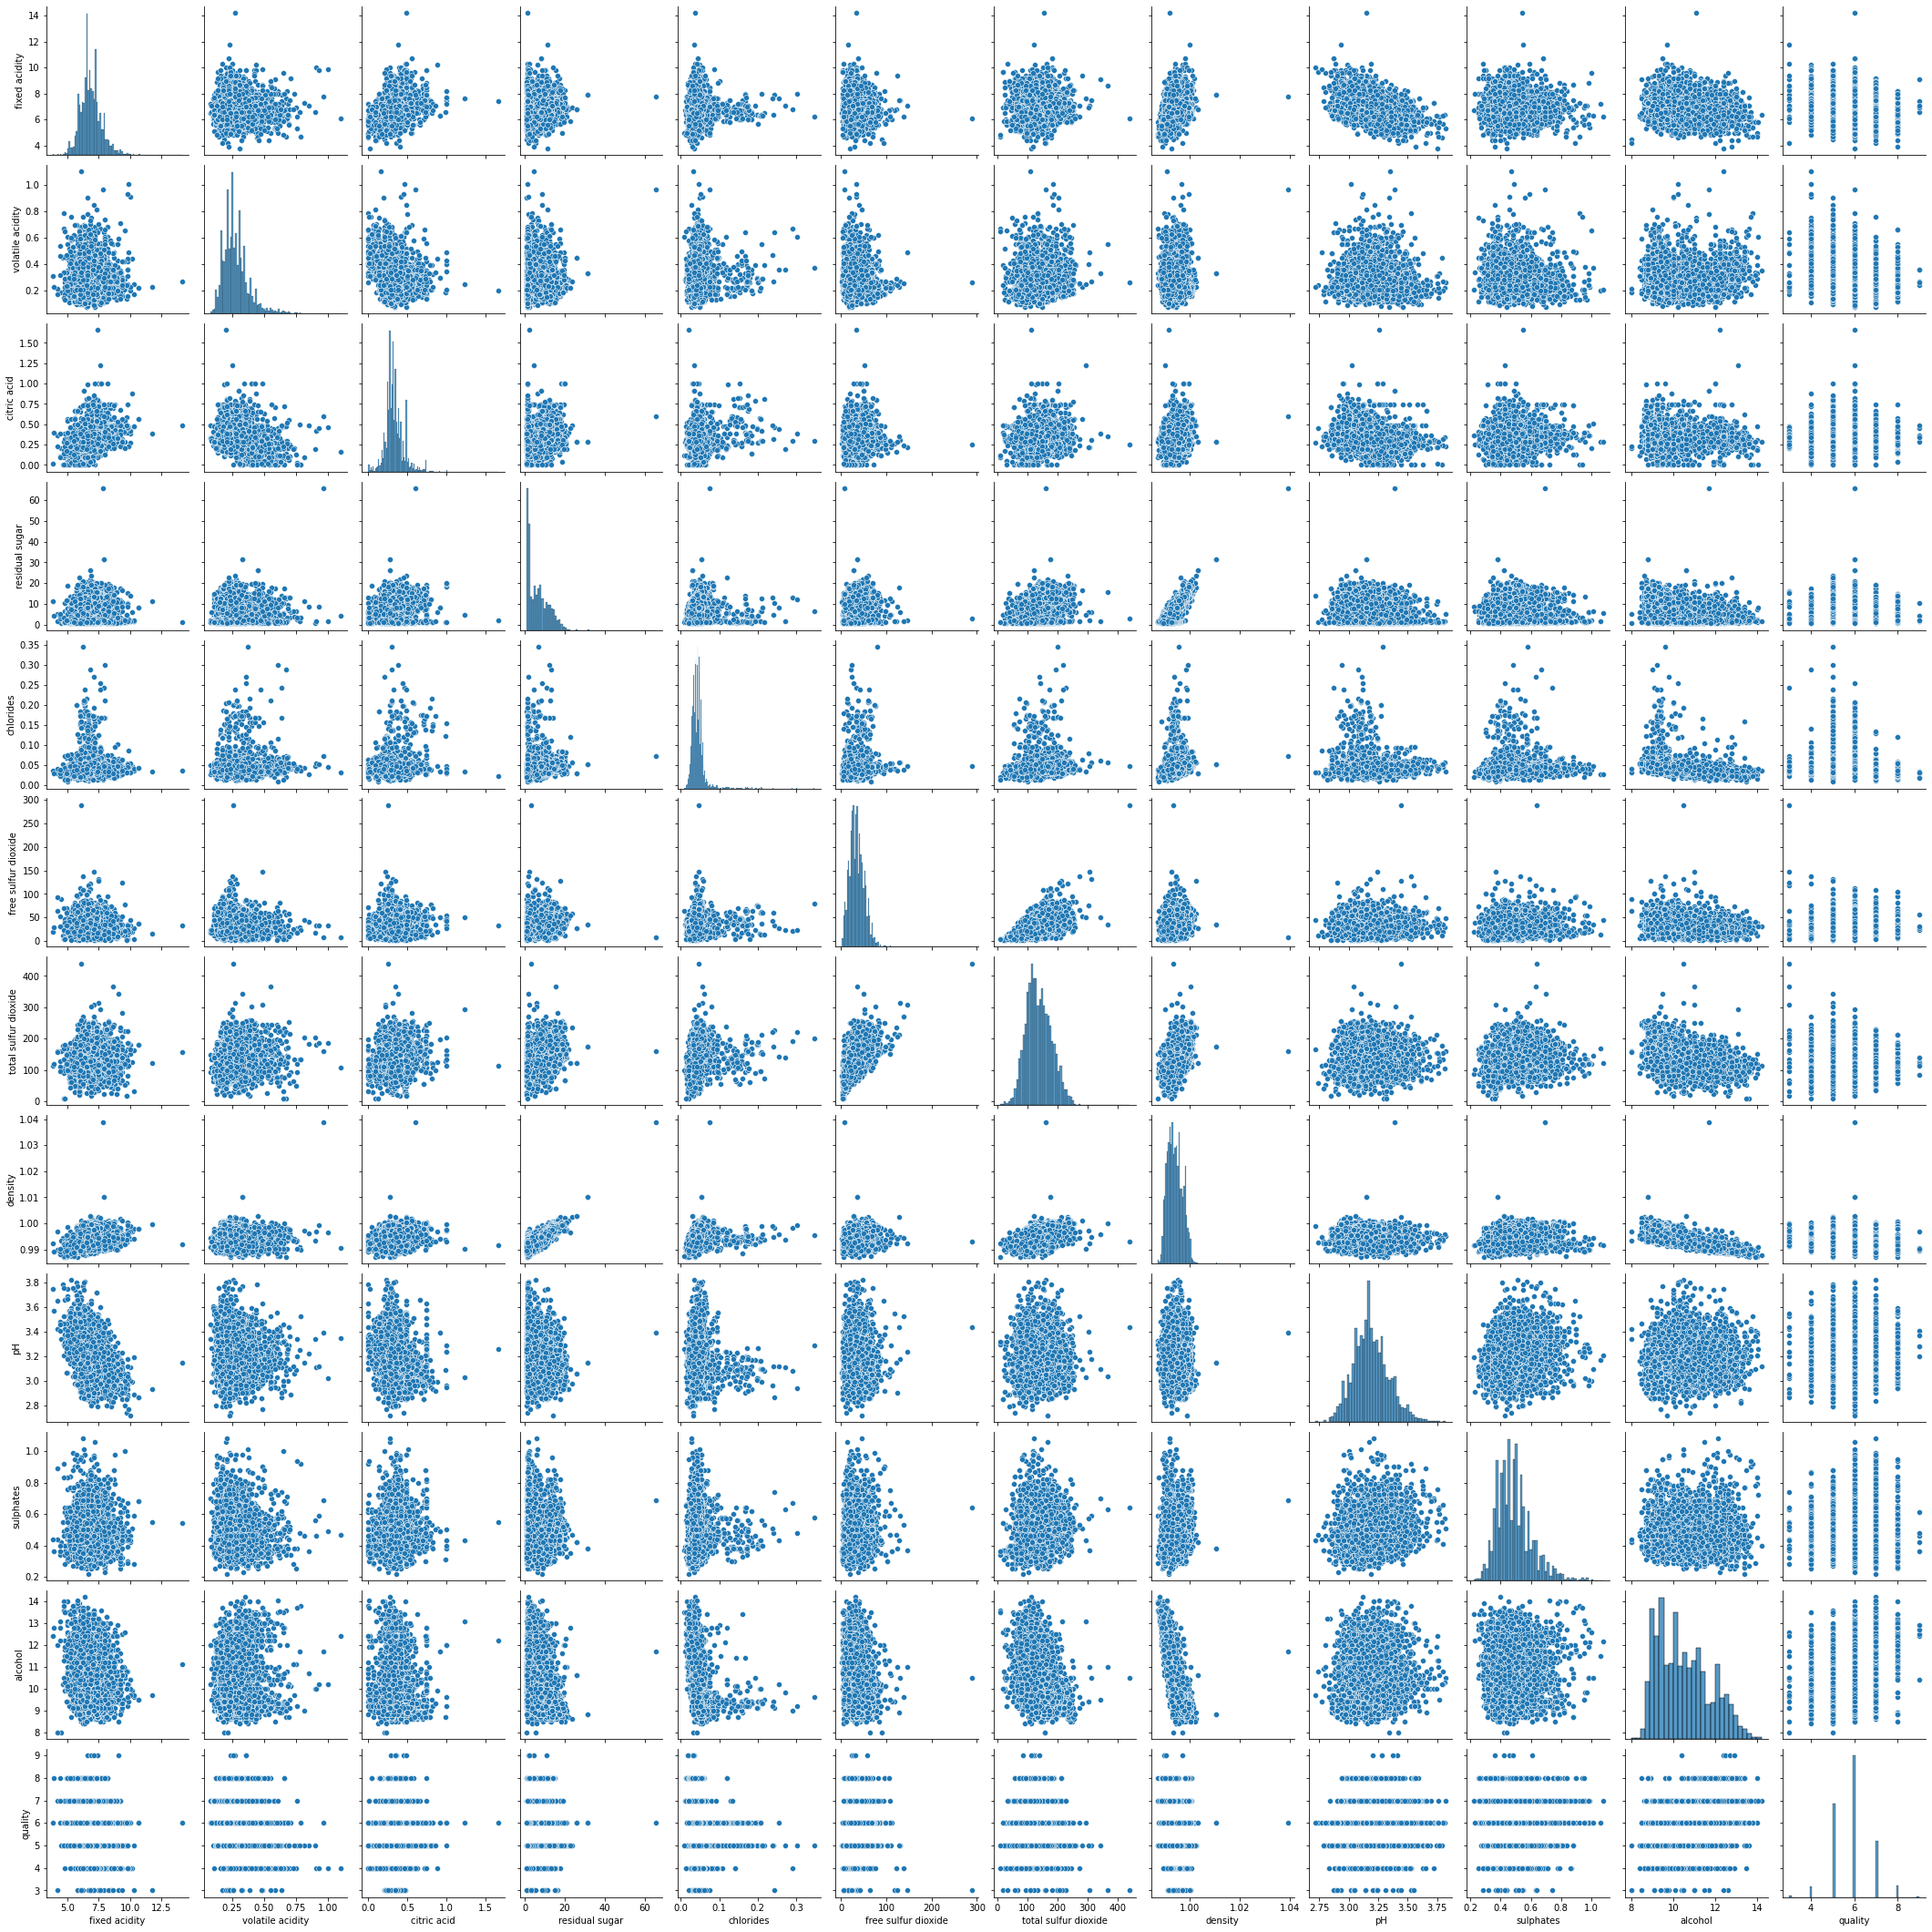

In [9]:
sns.pairplot(data)

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


let's try to predict ozone

In [11]:
sns.distplot(data['ozone'],bins=20)

KeyError: 'ozone'

is this normally distributed?

In [12]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
365-91

274

In [14]:
var = np.where((data['doy']>=91) & (data['doy']<=274),1,0)

KeyError: 'doy'

In [15]:
data.insert(len(data.columns),'YearPoint2',var)

NameError: name 'var' is not defined

In [16]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
sns.jointplot(data['temp'],data['ozone'],hue=data['YearPoint2'])

KeyError: 'temp'

In [18]:
sns.scatterplot(data['temp'],data['ozone'],hue=data['YearPoint'],alpha=.5)
plt.title('Cool Plot - give me extra credit')
plt.show()

KeyError: 'temp'

wind does not appear related to ozone

Temp does

In [19]:
data.isnull().any() # this uses isnull method and then the any method, which looks for tru

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [20]:
X = np.array(data['temp']).reshape(data.shape[0],1)
y = data['ozone']

KeyError: 'temp'

In [21]:
sns.scatterplot(X[:,0],y)

NameError: name 'X' is not defined

In [22]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


Can I predict the ozone based on temperature?

What kind of model should we use here?

In [23]:
model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results1 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel1 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results1.mean(),results1.std())

NameError: name 'X' is not defined

In [24]:
sns.scatterplot(ymodel1,ymodel1-y)
plt.xlabel('residuals')

NameError: name 'ymodel1' is not defined

In [25]:
p = PolynomialFeatures(2) # create the polynomial object we are interested in
X_p = p.fit_transform(X) # get the transformed features

model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results2 = model_selection.cross_val_score(model,X_p,y,cv=kfold)
ymodel2 = model_selection.cross_val_predict(model,X_p,y,cv=kfold)
print(results2.mean(),results2.std())

NameError: name 'X' is not defined

In [26]:
sns.scatterplot(ymodel2,ymodel2-y)
plt.xlabel('residuals')

NameError: name 'ymodel2' is not defined

In [27]:
sns.set_context('notebook')

In [28]:
sns.scatterplot(x= X[:,0],y =y,label='raw')
sns.scatterplot(x = X[:,0],y=ymodel1,color='r',label='linear')
sns.scatterplot(x = X[:,0],y= ymodel2,color='g',label='non-linear')
#sns.scatterplot(x = X[:,0],y= ymodel_whoa,color=[0,.5,1],label='non-linear')
plt.xlabel('temperature')
plt.legend()
plt.show()

NameError: name 'X' is not defined

We want to use cross validation to evaluate our prediction

Kfold is a good method

our data is ordered

In [29]:
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


can we use the ozone to predict whether its hot or cold outside?

In [30]:
X = np.array(data['ozone']).reshape(data.shape[0],1)
y = data['YearPoint2']

KeyError: 'ozone'

In [31]:
sns.boxplot(y=X[:,0],x=y)
plt.ylabel('ozone')

NameError: name 'X' is not defined

In [32]:
model = LogisticRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results1 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel1 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results1.mean(),results1.std())

NameError: name 'X' is not defined

In [33]:
model = tree.DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results2 = model_selection.cross_val_score(model,X,y,cv=kfold)
ymodel2 = model_selection.cross_val_predict(model,X,y,cv=kfold)
print(results2.mean(),results2.std())

NameError: name 'X' is not defined

In [34]:
fpr, tpr, thresholds = metrics.roc_curve(y,ymodel1)

NameError: name 'y' is not defined

In [35]:
fpr2, tpr2, thresholds2 = metrics.roc_curve(y,ymodel2)

NameError: name 'y' is not defined

roc plot

In [36]:
plt.plot(fpr,tpr,marker='^',label='logit')
plt.plot(fpr2,tpr2,marker='^',label='tree')
plt.plot([0,1],[0,1],linestyle=':',color=[0,0,0])

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()

plt.show()

NameError: name 'fpr' is not defined

In [37]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [38]:
y = data['ozone']

KeyError: 'ozone'

In [39]:
model = LinearRegression()
kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=1)
results_whoa = model_selection.cross_validate(model,data[['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']],y,cv=kfold,return_train_score=True)
ymodel_whoa = model_selection.cross_val_predict(model,data[['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis']],y,cv=kfold)
print(results_whoa)

KeyError: "None of [Index(['vh', 'wind', 'humidity', 'temp', 'ibh', 'dpg', 'ibt', 'vis'], dtype='object')] are in the [columns]"

In [40]:
results_whoa['train_score']

NameError: name 'results_whoa' is not defined

In [41]:
results_whoa['test_score']

NameError: name 'results_whoa' is not defined